In [21]:
# Let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv("happiness_score_dataset.csv")  # read the data
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
data.shape

(158, 12)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [25]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


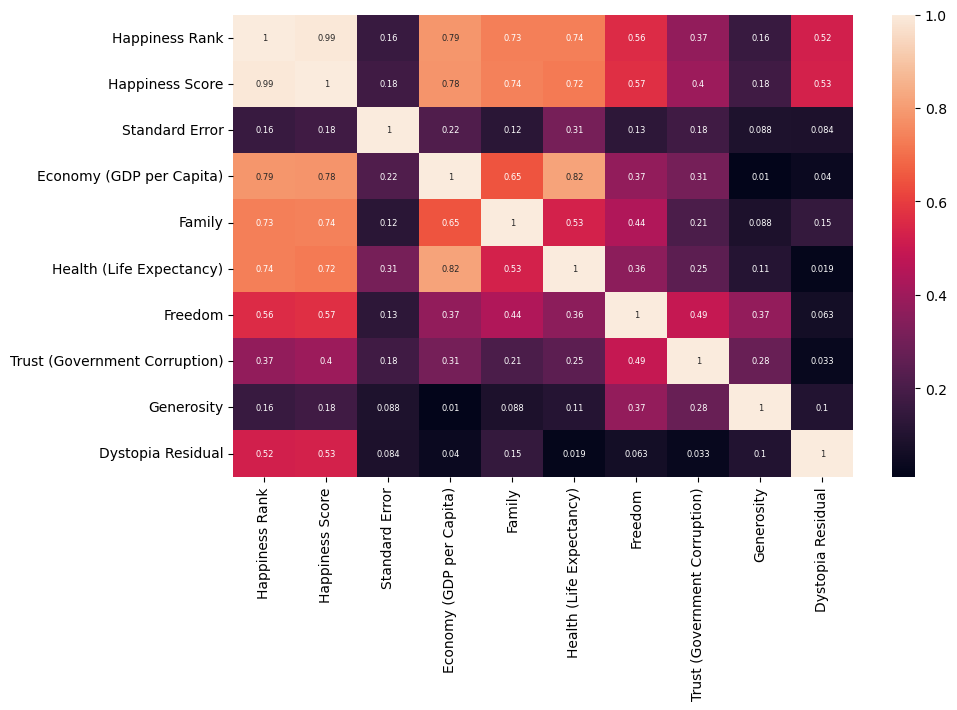

In [26]:
df = data.drop(columns =['Country','Region'])
df_corr = df.corr().abs() # This code will get the coefficient of one variable vs all other variable (Relationship)

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':6})
plt.show()

as per above graph we see there is no relation in happiness score and between Standard Error, Trust (Government Corruption), Generosity

In [27]:
X = data.drop(columns = ['Happiness Score','Standard Error','Trust (Government Corruption)','Generosity','Country','Region'])
y = data['Happiness Score']

In [28]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state=355)

In [30]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [32]:
X.tail(2)

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
156,157,0.01530,0.41587,0.22396,0.11850,1.83302
157,158,0.20868,0.13995,0.28443,0.36453,1.56726


In [35]:
data.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [34]:
# Since we have already fit the scaler, you can transform the data
print('charges : ', regression.predict(scalar.transform([[157,0.01530,0.41587, 0.22396,0.11850,1.83302]])))

charges :  [3.22469902]


In [36]:
#adjusted R2
regression.score(x_train,y_train)

0.9897953777164467

In [37]:
regression.score(x_test,y_test)

0.9872113027541805

In [39]:
y_pred = regression.predict(x_test)

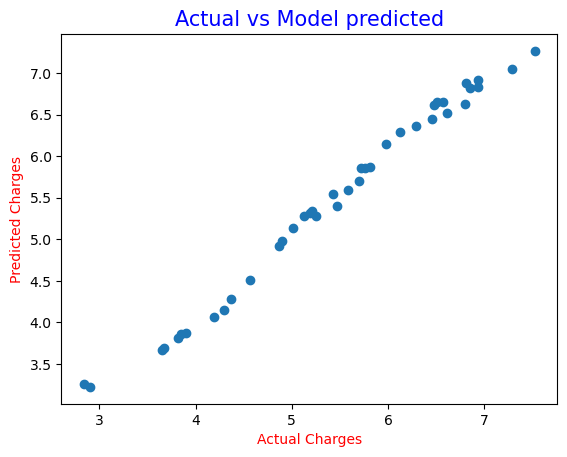

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges', fontsize=10, color='r')
plt.ylabel('Predicted Charges', fontsize=10, color='r')
plt.title('Actual vs Model predicted', fontsize=15, color='b')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
# MAE
mean_absolute_error(y_test,y_pred)

0.1052989318695489

In [43]:
# MSE
mean_squared_error(y_test,y_pred)

0.018745380640801716

In [44]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.1369137708223746